# Gráficos engañosos

Desde el inicio de la pandemia este tipo de gráfico ha sido muy popular, pareciendo mostrar el estado en que se encuentra cada entidad representada en la guerra contra el coronavirus

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from utils import get_connection_covid_tracking,get_df_sql

import pandas as pd
import numpy as np
import psycopg2
import pandas.io.sql as sqlio

from matplotlib import pyplot as plt

from utils import get_connection_covid_tracking,get_df_sql

import warnings
from IPython.display import clear_output
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/reisson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
conn = get_connection_covid_tracking()

sqlCasesPositives = "SELECT b.* , DATE_PART('day', b.time_date::timestamp - b.first_date_state::timestamp) as diff_first_days from\
        (SELECT *, min(a.time_date) OVER (PARTITION BY state_name) first_date_state FROM \
            (SELECT * FROM public.get_dataset) a ) b ;" 

sqlTestResults = "SELECT b.* , DATE_PART('day', b.time_date::timestamp - b.first_date_state::timestamp) as diff_first_days from\
        (SELECT *, min(a.time_date) OVER (PARTITION BY state_name) first_date_state FROM \
            (SELECT * FROM public.get_dataset_test_results) a ) b ;" 

In [3]:
dfDatasetPosCases = get_df_sql(sqlCasesPositives,conn)  
dfDatasetTestResults = get_df_sql(sqlTestResults,conn)


dfDatasetPosCases['time_date'] = pd.to_datetime(dfDatasetPosCases['time_date'])
dfDatasetPosCases = dfDatasetPosCases.set_index(['diff_first_days'])\
                     .squeeze().sort_index()

dfDatasetTestResults['time_date'] = pd.to_datetime(dfDatasetTestResults['time_date'])
dfDatasetTestResults = dfDatasetTestResults.set_index(['diff_first_days'])\
                     .squeeze().sort_index()

In [4]:
posCasesWa = dfDatasetPosCases[dfDatasetPosCases['state_name'] == 'WA']
testResultsWa = dfDatasetTestResults[dfDatasetTestResults['state_name'] == 'WA']

posCasesCt = dfDatasetPosCases[dfDatasetPosCases['state_name'] == 'CT']
testResultsCt = dfDatasetTestResults[dfDatasetTestResults['state_name'] == 'CT']

posCasesCa = dfDatasetPosCases[dfDatasetPosCases['state_name'] == 'CA']
posCasesNy = dfDatasetPosCases[dfDatasetPosCases['state_name'] == 'NY']

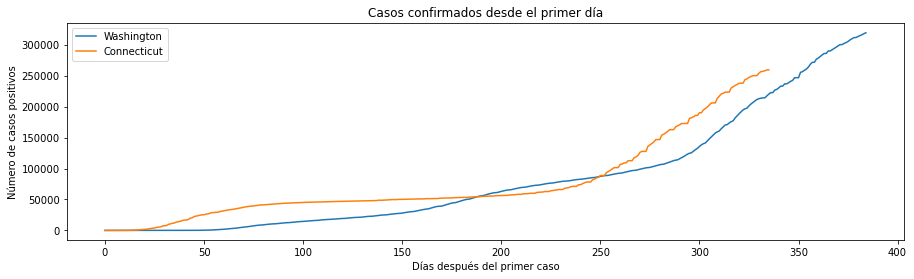

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 1*4))
ax.set_title(f'Casos confirmados desde el primer día')
ax.plot(posCasesWa['pos_cases_value'])
ax.plot(posCasesCt['pos_cases_value'])
ax.legend(['Washington','Connecticut'])
ax.set_xlabel('Días después del primer caso')
ax.set_ylabel('Número de casos positivos')
fig.show()

1. No es un gráfico de todos los casos de coronavirus, es solo un gráfico de todos los casos confirmados.
No solo nos muestra la propagación en un estado, sino el nivel de esfuerzo que está haciendo el esatdo para detectar el virus.
Curioso el caso que vemos haciendo comparación entre Connecticut y Washington, donde la cantidad de casos positivos es muy similar entre ambos, haciendonos suponer que Washington ha venido trabajando mejor en la contensión de la pandemia, teniendo en cuenta que Washington cuenta con una población de 7 millones y Connecticut solo 3.
Sin embargo al analizar el siguiente gráfico podemos darnos cuenta que no precisamente es así

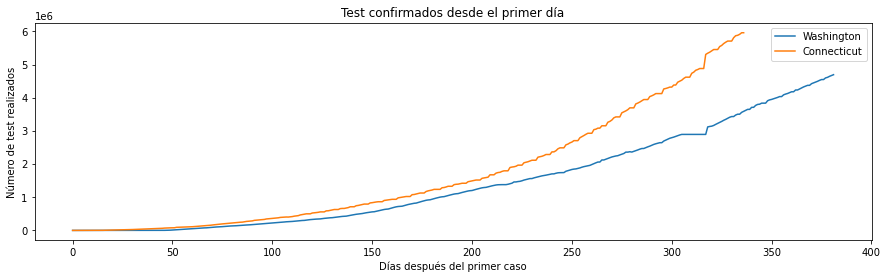

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 1*4))
ax.set_title(f'Test confirmados desde el primer día')
ax.plot(testResultsWa['test_result_value'])
ax.plot(testResultsCt['test_result_value'])
ax.legend(['Washington','Connecticut'])
ax.set_xlabel('Días después del primer caso')
ax.set_ylabel('Número de test realizados')
fig.show()

Como vemos, el número de test realizados en CT ha venido creciendo y a este día supera en un 30% aproximadamente a los realizados en WA.
A medida que WA empieza a aumentar el número de test, sus cifras van en aumento, considerando que la población de CT equivale al 50% de WA

- Una visión mucho más clara la tenemos visualizando el gráfico de casos confirmados por covid-19 de la siguiente manera, realizando la escala del eje Y en lo que se denomina una escala logarítmica o log scale.
- Agregaremos un estado que supera en creces la población de los antes mencionados(CALIFORNIA: 39.5 millones de habitantes, y NEW YORK : 19.5 millones).
- Añadiéndola al primer gráfico, podemos ver que superan demasiado el número de casos positivos a los otros dos, siendo quien más se resalta California.

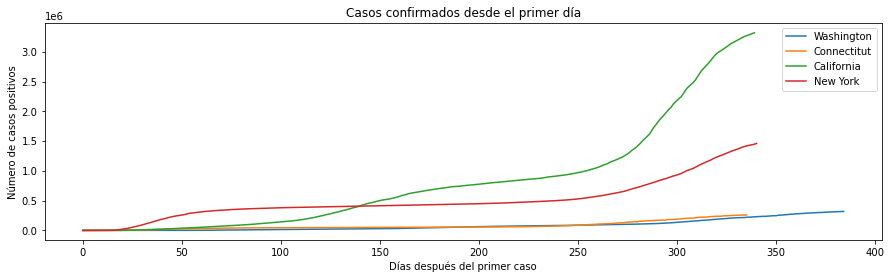

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 1*4))
ax.set_title(f'Casos confirmados desde el primer día')
ax.plot(posCasesWa['pos_cases_value'])
ax.plot(posCasesCt['pos_cases_value'])
ax.plot(posCasesCa['pos_cases_value'])
ax.plot(posCasesNy['pos_cases_value'])
ax.legend(['Washington','Connectitut','California','New York'])
ax.set_xlabel('Días después del primer caso')
ax.set_ylabel('Número de casos positivos')
fig.show()

- Sin embargo, aplicando la escala logarítmica al eje Y y visualizándolo de esta forma, observamos que en un inicio, Connectitut tuvo un brote muy similar al de California, pero lo de New York fue mucho peor.
- Un punto clave a tener en cuenta y con mucha alerta es que a medida que en Washington se fueron incrementando el número de pruebas, los resultados positivos al test crecieron de una manera muy agresiva, superando a Connectitut y cada vez más cerca de New York

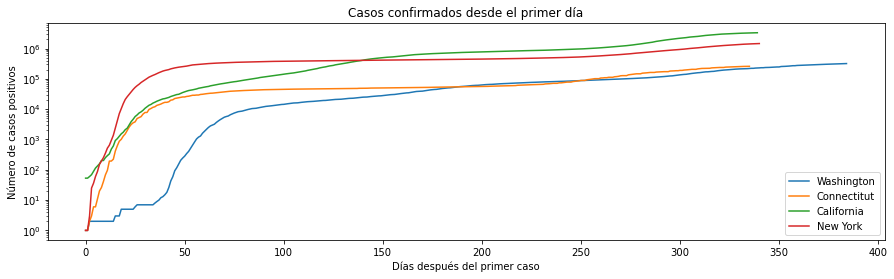

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 1*4))
ax.set_title(f'Casos confirmados desde el primer día')
ax.plot(posCasesWa['pos_cases_value'])
ax.plot(posCasesCt['pos_cases_value'])
ax.plot(posCasesCa['pos_cases_value'])
ax.plot(posCasesNy['pos_cases_value'])
ax.legend(['Washington','Connectitut','California','New York'])
ax.set_xlabel('Días después del primer caso')
ax.set_ylabel('Número de casos positivos')
fig.show()
plt.yscale("log")

Un punto importante a tener en cuenta es que el eje X está medido en la cantidad de días después que del primer reporte de casos, debido a que la pandemia no golpeó a todos los estados al mismo tiempo